In [51]:
import tensorflow as tf
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

I = misc.ascent()

In [52]:
# Styles

my_style = {
    'figure.facecolor': '#111111',
    'axes.facecolor': '#111111',
    'axes.labelcolor': '#bbbbbb',
    'axes.titlecolor': '#bbbbbb',
    'xtick.color': '#bbbbbb',
    'ytick.color': '#bbbbbb',
    'legend.facecolor': '#111111',
    'legend.edgecolor': '#bbbbbb',
    'text.color': '#bbbbbb',
    'axes.edgecolor': '#bbbbbb',
    'font.size': 10
}

plt.style.use(my_style)

In [53]:
# GPU
gpu_available = tf.config.list_physical_devices('GPU')
print("GPU Available:", gpu_available)

# TensorFlow Version
print("TensorFlow Version:", tf.__version__)

# List GPU Available
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("\nInfo about GPU:")
    print(tf.config.experimental.get_device_details(gpu))

# Reset Keras Session | clear memory GPU

# from tensorflow.keras.backend import set_session, clear_session, get_session
# import gc
#
# def reset_keras():
#     sess = get_session()
#     clear_session()
#     sess.close()
#     sess = set_session()
#
#     # garbage collector
#     gc.collect()
#
#     # use the same config as you used to create the session
#     config = tf.compat.v1.ConfigProto()
#     config.gpu_options.per_process_gpu_memory_fraction = 1
#     config.gpu_options.visible_device_list = '0'
#     set_session(tf.compat.v1.Session(config=config))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow Version: 2.10.0

Info about GPU:
{'device_name': 'NVIDIA GeForce GTX 1650 with Max-Q Design', 'compute_capability': (7, 5)}


In [54]:
I.shape

(512, 512)

In [55]:
K = I[101:131, 120:130]
K

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

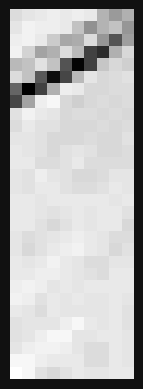

In [56]:
plt.gray()
plt.axis('off')
plt.imshow(K)
plt.show()

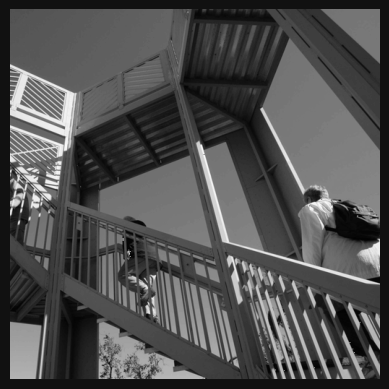

In [57]:
plt.gray()
plt.axis('off')
plt.imshow(I)
plt.show()

In [58]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

In [59]:
filter = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
# filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

weight = 1

In [60]:
np.array(filter).shape

(3, 3)

In [61]:
np.array(filter).T

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

#### Convolution

In [62]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (I[x-1, y-1] * filter[0][0])
        convolution = convolution + (I[x, y-1] * filter[0][1])
        convolution = convolution + (I[x+1, y-1] * filter[0][2])
        convolution = convolution + (I[x-1, y] * filter[1][0])
        convolution = convolution + (I[x-1, y+1] * filter[2][0])
        convolution = convolution + (I[x, y] * filter[1][1])
        convolution = convolution + (I[x+1, y] * filter[1][2])
        convolution = convolution + (I[x+1, y+1] * filter[2][2])
        convolution = convolution + (I[x, y+1] * filter[2][1])
        convolution *= weight

        if convolution < 0:
            convolution = -convolution

        if convolution > 255:
            convolution = 255

        I_transformed[x, y] = convolution

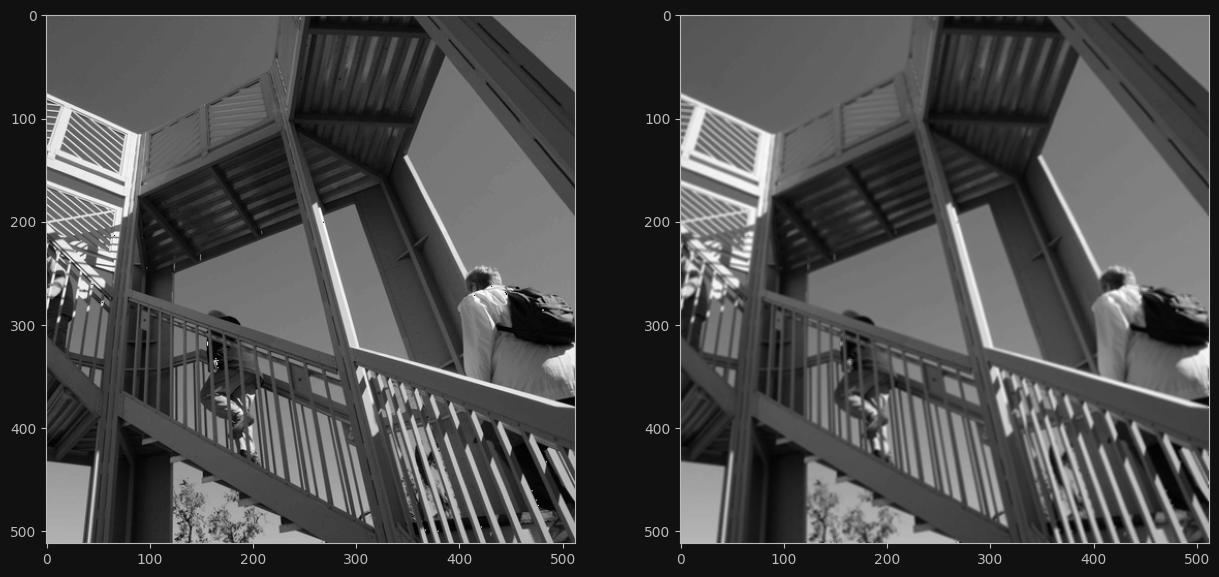

In [63]:
plt.figure(figsize=(15, 7))
plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(I)
plt.subplot(1, 2, 2)
plt.imshow(I_transformed)
plt.show()

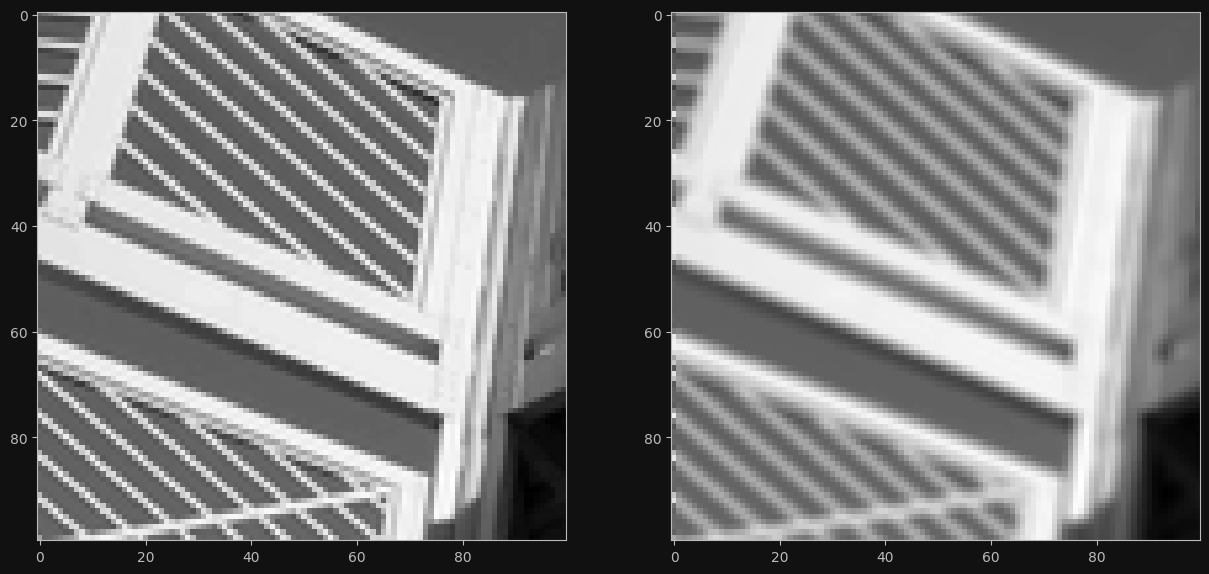

In [64]:
ymin, ymax, xmin, xmax = 100, 200, 0, 100

plt.figure(figsize=(15, 7))
plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(I[ymin:ymax, xmin:xmax])
plt.subplot(1, 2, 2)
plt.imshow(I_transformed[ymin:ymax, xmin:xmax])
plt.show()

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

from tensorflow.keras.utils import plot_model

In [66]:
data = [
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 0],
]

data = np.array(data)
data = data.reshape(1, 8, 8, 1)

In [67]:
x_input = Input(shape=(8,8,1))
x_conv = Conv2D(1, (3, 3), strides=(1, 1), activation='relu')(x_input)
x_pool = MaxPooling2D()(x_conv)

In [68]:
model = Model(x_input, x_pool)
model_conv = Model(x_input, x_conv)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 1)           10        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 1)          0         
 2D)                                                             
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


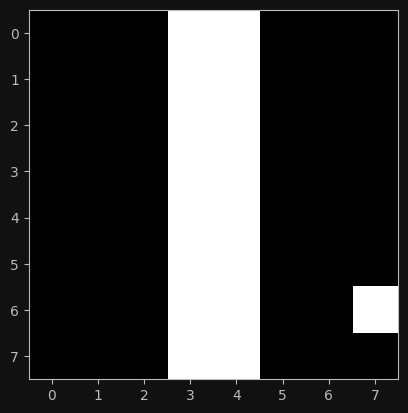

In [69]:
plt.imshow(data[0,:,:,0])
plt.show()

In [70]:
hh = model.layers[-2]
hh

In [71]:
w_old = model.layers[-2].get_weights()
w_old

[array([[[[-0.50563353]],
 
         [[-0.51512563]],
 
         [[-0.08633515]]],
 
 
        [[[ 0.19196689]],
 
         [[-0.24632472]],
 
         [[ 0.5294827 ]]],
 
 
        [[[-0.21635604]],
 
         [[ 0.29185045]],
 
         [[ 0.39074463]]]], dtype=float32),
 array([0.], dtype=float32)]

In [72]:
w_old[0].shape

(3, 3, 1, 1)

In [73]:
detector = [
    [
        [[0]], [[1]], [[0]]
    ],
    [
        [[0]], [[1]], [[0]]
    ],
    [
        [[0]], [[1]], [[0]]
    ]
]

weights = [np.array(detector), np.array([0.0])]

model.set_weights(weights)

ypool = model.predict(data)

print(ypool[0].T)

1/1 [==============================] - 0s 41ms/step
[[[0. 0. 0.]
  [3. 3. 3.]
  [0. 0. 0.]]]


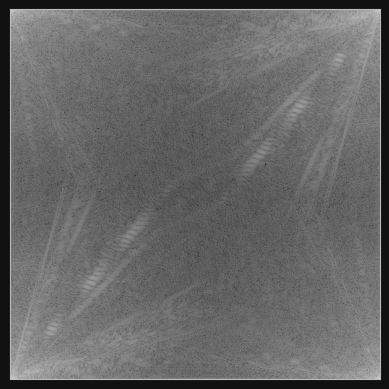

In [74]:
# TF -> FFT
fft_img = tf.signal.fft3d(I.reshape((1, 512, 512, 1)))

plt.imshow(tf.math.log(tf.math.abs(fft_img)).numpy()[0,:,:,0])
plt.xticks([])
plt.yticks([])
plt.show()

#### Lenet 5

In [75]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [77]:
# Normalize
x_train /= 255
x_test /= 255

In [78]:
# One-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [79]:
# Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#### Model

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, losses

# Empty model
model = Sequential()

# 1 Convolutional layer
# filters: 6, (5, 5), step: (1, 1), padding (+2, +2)
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'))

# 2 Convolutional layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# 3 Convolutional layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# 4 Convolutional layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# 5 Convolutional layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# 6 Smoothing CNN
model.add(layers.Flatten())

# 7 Dense layer
model.add(layers.Dense(84, activation='tanh'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# Compile
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print(f'Test loss: {test_score[0]:.4f}, accuracy: {test_score[1] * 100:.2f}%')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

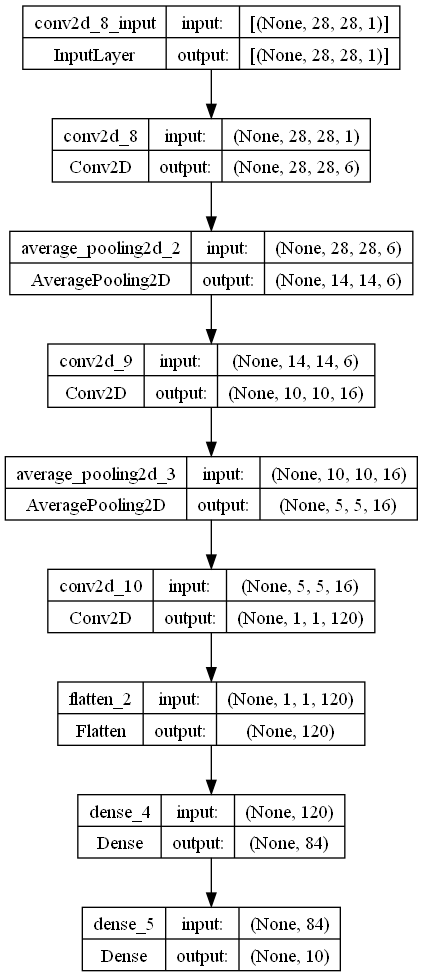

In [81]:
from keras.utils.vis_utils import plot_model
plot_model(model, './visual/model_sconv.png', show_shapes=True)

In [82]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


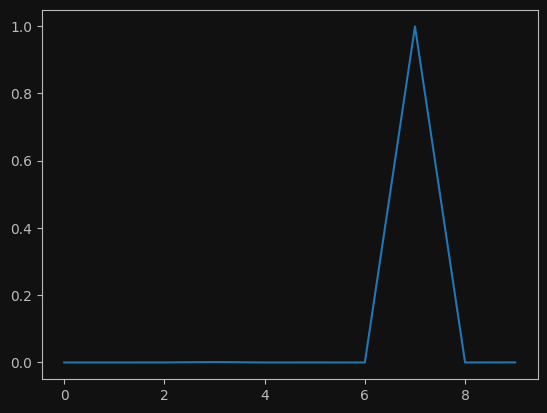

[7] 0.9984707


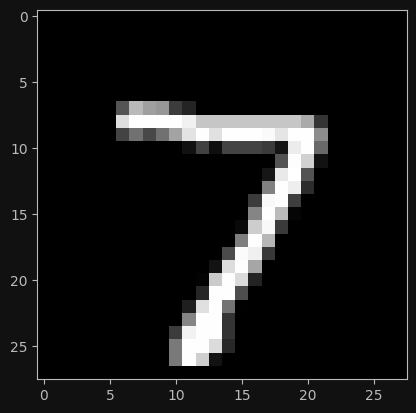

In [83]:
plt.plot(y_pred[0][:])
plt.show()
print(np.where(y_pred[0][:] == y_pred[0][:].max())[0], y_pred[0][:].max())
plt.imshow(x_test[0][:,:,0])
plt.show()

#### AlexNet

In [84]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [85]:
num_classes = 10
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'save_models')
model_name = 'keras_cifar10_trained_model.h5'

In [86]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [87]:
print(f'x_train_shape: {x_train.shape}')
print(f'{x_train.shape[0]} training examples')
print(f'{x_test.shape[0]} testing examples')

x_train_shape: (50000, 32, 32, 3)
50000 training examples
10000 testing examples


In [88]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [89]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

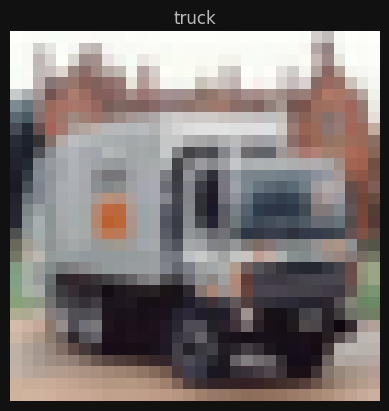

In [90]:
N = 11
plt.imshow(x_test[N,:,:,:])
plt.title(classes[np.argmax(y_test[N,:])])
plt.axis('off')
plt.show()

#### Model

In [91]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [92]:
%%time

epochs = 40
batch_size = 2000
data_augmentation = True

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

if not data_augmentation:
    print('Not data augmentation.')

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Data augmentation.')
    if tf.config.list_physical_devices('GPU'):
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            zca_epsilon=1e-06,
            rotation_range=5,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.,
            zoom_range=0.,
            channel_shift_range=0.,
            fill_mode='nearest',
            cval=0.,
            horizontal_flip=True,
            vertical_flip=False,
            rescale=None,
            preprocessing_function=None,
            data_format=None,
            validation_split=0.0)

        datagen.fit(x_train)

        model.fit(datagen.flow(x_train, y_train,
                            batch_size=batch_size),
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            workers=-1)

        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)

        model_path = os.path.join(save_dir, model_name)
        model.save(model_path)
        print(f'Save path: {model_path}')

        #model.summary()

        scores = model.evaluate(x_test, y_test, verbose=1)
        print(f'Test loss: {scores[0]}')
        print(f'Test accuracy: {scores[1] * 100:.02f}%')
    else:
        print('Oops..')

Data augmentation.
Epoch 1/40
25/25 [==============================] - 26s 987ms/step - loss: 2.0782 - accuracy: 0.2306 - val_loss: 1.7660 - val_accuracy: 0.3709
Epoch 2/40
25/25 [==============================] - 24s 976ms/step - loss: 1.7587 - accuracy: 0.3566 - val_loss: 1.5748 - val_accuracy: 0.4317
Epoch 3/40
25/25 [==============================] - 25s 983ms/step - loss: 1.6180 - accuracy: 0.4033 - val_loss: 1.4787 - val_accuracy: 0.4490
Epoch 4/40
25/25 [==============================] - 25s 990ms/step - loss: 1.5254 - accuracy: 0.4390 - val_loss: 1.4272 - val_accuracy: 0.4825
Epoch 5/40
25/25 [==============================] - 25s 982ms/step - loss: 1.4638 - accuracy: 0.4682 - val_loss: 1.3123 - val_accuracy: 0.5220
Epoch 6/40
25/25 [==============================] - 25s 991ms/step - loss: 1.4122 - accuracy: 0.4876 - val_loss: 1.2738 - val_accuracy: 0.5398
Epoch 7/40
25/25 [==============================] - 25s 1s/step - loss: 1.3626 - accuracy: 0.5089 - val_loss: 1.2656 - val_

#### Conclusion:

ImageDataGenerator - достаточно сложная сущность, но в подобных задачах необходимая.
Улучшение модели наблюдается при правильном подборе параметров сверточных слоев и технических вспомогательных слоев.
Было замечено, что если мы изменяем Dropout с 0.25 до 0.5, модель теряла в точности.
Оптимизатор SGD был заменен на Adam, это улучшило модель.
Количество эпох было увелично до 40. +
Размер пакета был увеличен до 2000.
Что позволило сделать разбивку датасета менее трудозатратной, но с большей нагрузкой на процессор.

Если бы мы использовали Cifar100, нам бы понадобилось использовать большее количество слоев, т.к. автоматически,
признаков, которые нейросеть могла найти на внутренних слоях было бы намного больше.